Q1. What is the mathematical formula for a linear SVM?

Ans. The mathematical formula for a linear Support Vector Machine (SVM) can be expressed in terms of a linear decision boundary. Given a set of training data with features x_i and corresponding binary labels y_i (where y_i ∈ {-1, 1}, the decision function for a linear SVM is defined as:
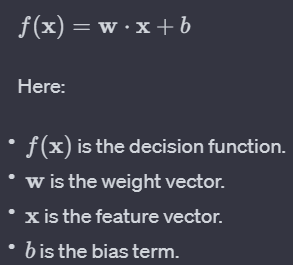
The decision function is used to determine the predicted class of a given instance. If f(x) is positive, the instance is classified as class 1; if f(x) is negative, the instance is classified as class -1.

The weight vector w and bias term  b are learned during the training of the SVM. The objective during training is to find the values of w and  b that maximize the margin between the two classes while satisfying the constraint that the instances are correctly classified. This leads to the formulation of the optimization problem associated with linear SVM, which involves minimizing the squared norm of w subject to certain constraints.

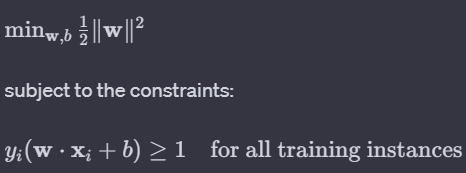

Here, ||w||^2 is the squared norm of the weight vector, and the constraints ensure that the instances are correctly classified with a margin of at least 1. The optimization problem is typically solved using techniques such as quadratic programming.

The optimal values of w and b obtained from solving this optimization problem define the linear decision boundary of the SVM. Once trained, the SVM can make predictions using the decision function.





Q2. What is the objective function of a linear SVM?

Ans. The objective function of a linear Support Vector Machine (SVM) is a mathematical expression that defines the optimization problem the SVM aims to solve during training. The objective is to find the optimal parameters, specifically the weight vector w and bias term b, that define a hyperplane with a maximal margin between the classes while ensuring correct classification.

For a linear SVM, the objective function is formulated as follows:

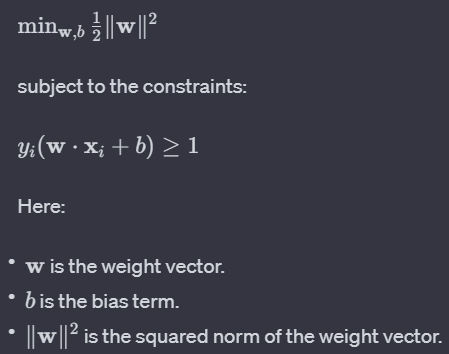

The objective function consists of two components:

1. **Minimization of 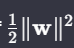
   - This term represents the regularization or penalty term. The goal is to minimize the squared norm of the weight vector. Minimizing \( \|\mathbf{w}\|^2 \) corresponds to maximizing the margin between the two classes. The SVM seeks to find the decision boundary (hyperplane) that maximally separates the classes.

2. **Subject to Constraints 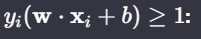
   - These are the classification constraints. For each training instance \( (\mathbf{x}_i, y_i) \), the product \( y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \) must be greater than or equal to 1. This ensures that each instance is correctly classified with a margin of at least 1. The margin is the perpendicular distance from the hyperplane to the nearest instance of either class.

The goal of the optimization problem is to simultaneously minimize the regularization term (squared norm of w and satisfy the classification constraints. Solving this optimization problem results in finding the optimal values for w and b that define the hyperplane with the maximum margin.



Q3. What is the kernel trick in SVM?

Ans. The kernel trick is a technique used in Support Vector Machines (SVMs) to implicitly map input features into a higher-dimensional space without explicitly computing the transformation. This allows SVMs to learn complex, non-linear decision boundaries in the original feature space.

### Background:

In SVM, the decision boundary is a hyperplane that separates data points of different classes. In a linear SVM, this hyperplane is defined by a linear combination of the input features. However, not all datasets are linearly separable, and in such cases, the SVM may not perform well.

### Kernel Trick:

The kernel trick is based on the idea of using a function, called a "kernel," to implicitly compute the dot product of the mapped features in the higher-dimensional space without explicitly transforming the data. This is computationally advantageous because it avoids the need to store and compute the explicit mapping of features.

The decision function in a kernelized SVM can be expressed as follows:

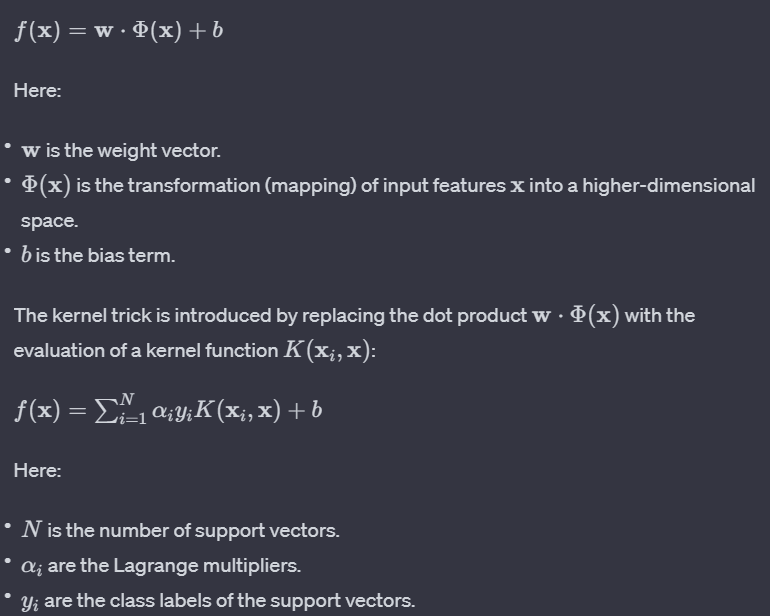

Q4. What is the role of support vectors in SVM? Explain with example.

Ans. In Support Vector Machines (SVM), support vectors play a crucial role in determining the optimal decision boundary (hyperplane) that maximizes the margin between different classes. Support vectors are the data points from the training set that influence the position and orientation of the decision boundary. These are the instances that are closest to the hyperplane and, in some cases, lie on the margin or violate the margin, influencing the SVM's learning process.

### Role of Support Vectors:

1. **Defining the Margin:**
   - Support vectors are the instances that determine the location and orientation of the decision boundary. The margin of an SVM is defined by the distance between the hyperplane and the nearest support vectors from each class.

2. **Maximizing Margin:**
   - The goal of SVM is to find the hyperplane that maximizes the margin between the classes. Support vectors are the instances that contribute to this maximization. The margin is the perpendicular distance from the hyperplane to the nearest support vectors.

3. **Determining Decision Boundary:**
   - The decision boundary is influenced by the support vectors, and it is designed to maintain a margin of separation between classes. The SVM aims to find the hyperplane that correctly classifies these support vectors and generalizes well to unseen data.

4. **Identifying Critical Instances:**
   - Support vectors are the critical instances that, if removed or altered, could potentially change the position of the decision boundary. They are the instances that are most influential in defining the SVM model.

### Example:

Consider a simple two-dimensional dataset with two classes, represented by circles and crosses. The decision boundary (hyperplane) is determined by the support vectors.



C:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


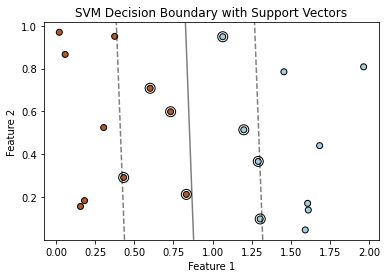

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create a simple dataset
np.random.seed(42)
X = np.random.rand(20, 2)
y = np.concatenate([np.ones(10), -np.ones(10)])

# Introduce a clear separation between classes
X[y == -1, 0] += 1

# Fit an SVM model
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

# Plot the decision boundary and margin
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margin lines
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Ans. To illustrate the concepts of Hyperplane, Marginal Plane, Soft Margin, and Hard Margin in Support Vector Machines (SVM), let's consider a simple two-dimensional dataset with two classes. We'll use scikit-learn to create SVM models and visualize the decision boundaries and margins.

### Example Code:




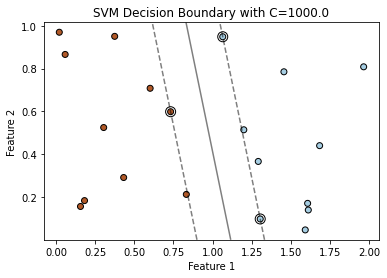

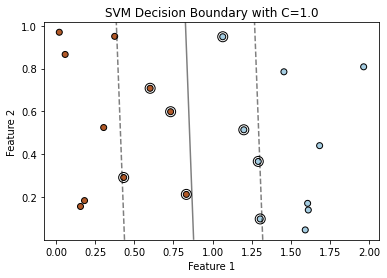

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create a simple dataset
np.random.seed(42)
X = np.random.rand(20, 2)
y = np.concatenate([np.ones(10), -np.ones(10)])

# Introduce a clear separation between classes
X[y == -1, 0] += 1

# Function to plot SVM decision boundary and margins
def plot_svm_margin(C=1.0):
    # Fit an SVM model
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

    # Plot the decision boundary and margin
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary and margin lines
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k')

    plt.title(f'SVM Decision Boundary with C={C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot SVM with Hard Margin (Large C)
plot_svm_margin(C=1e3)

# Plot SVM with Soft Margin (Small C)
plot_svm_margin(C=1.0)


## Explanation:

1. **Hard Margin SVM (Large C):**
   - When the regularization parameter \(C\) is large (e.g., \(C=10^3\)), it corresponds to a Hard Margin SVM. It penalizes misclassifications heavily, aiming for a strict separation between classes.



2. **Soft Margin SVM (Small C):**
   - When the regularization parameter \(C\) is small (e.g., \(C=1.0\)), it corresponds to a Soft Margin SVM. It allows some misclassifications to achieve a more flexible decision boundary that accommodates noisy or overlapping data.


In the examples, the decision boundaries are represented by solid lines, and the dashed lines indicate the margins. Support vectors are marked with larger circles. In the Hard Margin SVM, there are fewer support vectors, and the margin is narrower, resulting in a stricter separation. In the Soft Margin SVM, more instances are treated as support vectors, and the margin is wider, allowing for more flexibility in handling misclassifications.

Q6. SVM Implementation through Iris dataset.
• Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.
• Train a linear SVM classifier on the training set and predict the labels for the testing set.
• Compute the accuracy of the model on the testing set.
• Plot the decision boundaries of the trained model using two of the features.
• Try different values of the regularisation parameter C and see how it affects the performance of the model.

Ans. Certainly! Below is a Python code that demonstrates the implementation of a Support Vector Machine (SVM) on the Iris dataset using scikit-learn. It includes loading the dataset, splitting it into a training and testing set, training a linear SVM classifier, predicting labels, computing accuracy, and visualizing decision boundaries with varying regularization parameter \(C\).



Accuracy with C=1.0: 0.80


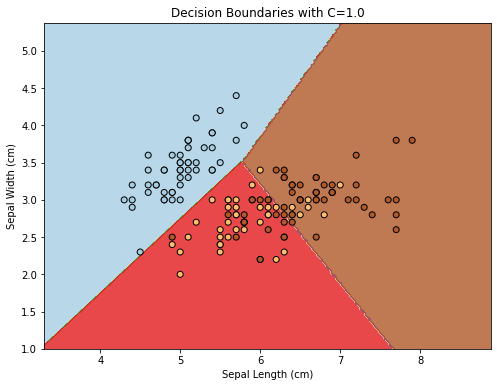

Accuracy with C=0.1: 0.82


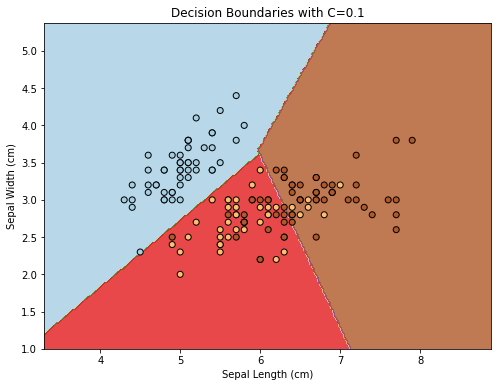

Accuracy with C=10.0: 0.80


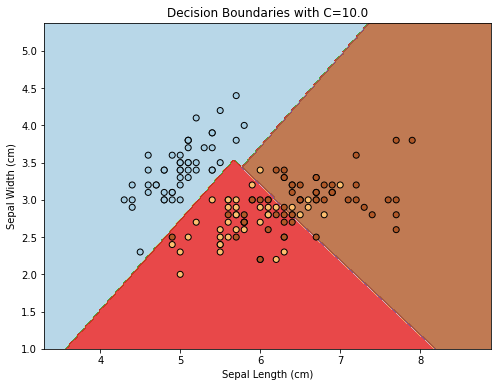

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train SVM, predict labels, and compute accuracy
def train_and_evaluate_svm(C):
    # Create and train the SVM model
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)

    # Predict labels for the testing set
    y_pred = clf.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with C={C}: {accuracy:.2f}')

    # Plot decision boundaries
    plt.figure(figsize=(8, 6))
    h = .02  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'Decision Boundaries with C={C}')
    plt.show()

# Train and evaluate SVM with different values of C
train_and_evaluate_svm(C=1.0)  # Default value
train_and_evaluate_svm(C=0.1)  # Lower C for softer margin
train_and_evaluate_svm(C=10.0)  # Higher C for stricter margin


In this code:

- We load the Iris dataset and consider only the first two features for simplicity and visualization.
- The dataset is split into a training set (70%) and a testing set (30%).
- The `train_and_evaluate_svm` function trains an SVM with a specified regularization parameter \(C\), predicts labels for the testing set, computes accuracy, and plots decision boundaries.
- We call this function with different values of \(C\) to observe how it affects the model's performance and decision boundaries.
